In [119]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import mols2grid

from rdkit import Chem
from rdkit.Chem import rdMolEnumerator
from src.utils import smi2mol, mol2smi

In [121]:
dataset = pd.read_csv('../data/raw/tox24_full_dataset.csv').rename(columns={
    'DTXSID': 'id',
    'Chemical': 'name',
    'CASRN': 'cas',
    'SMILES': 'smi',
    'Library': 'lib',
    'Median % activity': 'target',
})
dataset.smi = dataset.smi.str.strip()
dataset['rdmol'] = dataset.smi.apply(Chem.MolFromSmiles)

In [122]:
mols2grid.display(dataset, smiles_col='smi')

MolGridWidget()

In [123]:
train = dataset.query('dataset == "training"')
test = dataset.query("dataset in ['blind test', 'leaderboard']")
train.shape, test.shape

((1012, 10), (500, 10))

# Filter empty smiles

Structures were taken from 

United States Environmental Protection Agency Site:

https://cdxapps.epa.gov/oms-substance-registry-services/search

In [124]:
dataset[dataset.smi == '']

,id,name,cas,smi,lib,Max conc,target,Tested in CR?,dataset,rdmol
1,DTXSID1047364,SSR 103800,1075752-90-7,,ph2,92.6160,-45.013995,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66f949e0>
14,DTXSID2047696,Cremophor EL,61791-12-6,,e1k,100.0000,-22.029732,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66f94430>
45,DTXSID1048122,Benzyl-C8-18-alkyldimethylammonium chlorides,63449-41-2,,e1k,100.0035,-8.545316,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66f935a0>
56,DTXSID0028666,"1,2-Benzenedicarboxylic acid, di-C9-11-branche...",68515-49-1,,ph2,99.9990,-5.733572,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66f930d0>
129,DTXSID9047708,Igepal CO-890,NOCAS_47708,,e1k,100.0000,2.789288,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66f91070>
223,DTXSID4029565,"1,2-Benzenedicarboxylic acid, diundecyl ester,...",85507-79-5,,e1k,99.9960,6.083755,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66f8e570>
241,DTXSID1047526,C10-21 alkanesulfonic acids phenyl esters,91082-17-6,,ph2,100.0000,6.508961,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66f8dd90>
434,DTXSID2047517,"Hexanedioic acid, di-C7-9-branched and linear ...",68515-75-3,,e1k,99.9970,11.588435,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66f88820>
452,DTXSID0029848,"Acetic acid, C8-10-branched alkyl esters, C9-rich",108419-33-6,,e1k,100.0400,12.260664,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66f87f40>
496,DTXSID5028665,DINP branched,68515-48-0,,e1k,99.9980,13.376116,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66f86b20>


In [125]:
# drop empty smiles
dataset = dataset[dataset.smi != ''].copy()

In [126]:
dataset['mol_count'] = dataset.smi.str.split('.').apply(len)

# Filter extended smiles

In [127]:
mask = dataset.smi.str.contains('[|]')
mols2grid.display(dataset[mask], smiles_col='smi')

MolGridWidget()

In [128]:
# Drop them as they are polymers
dataset = dataset[~mask].copy()
dataset.shape

(1486, 11)

In [129]:
# mols2grid.display(train, smiles_col='smi', size=(200,100))
mols2grid.display(dataset.query('mol_count > 1'), smiles_col='smi', size=(200,100))

MolGridWidget()

# Preprocessing

### remove salts, water

In [130]:
from rdkit.Chem.SaltRemover import SaltRemover

remover = SaltRemover(defnData='[Cl,Na,K,N,O]')

# mols2grid.display(train.rdmol.apply(remover.StripMol))
mols2grid.display(dataset.query('mol_count > 1').rdmol.apply(remover.StripMol))

MolGridWidget()

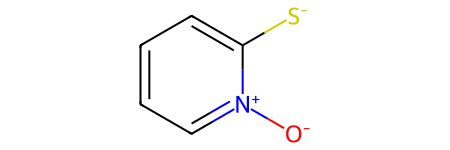

In [108]:
mol = Chem.MolFromSmiles('[N+](C)(C)(C)C.[Cl-]')
mol = Chem.MolFromSmiles('O=C([O-])CF.[Na+]')
mol = Chem.MolFromSmiles('[O-][n+]1ccccc1[S-]')
mol

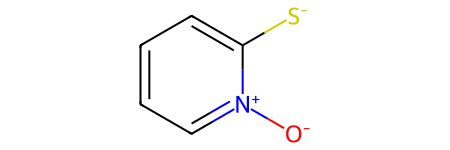

In [109]:
remover.StripMol(mol)

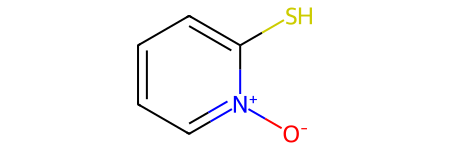

In [110]:
from rdkit.Chem.MolStandardize.rdMolStandardize import Cleanup, Reionize, Uncharger

uncharger = Uncharger()

uncharger.uncharge(remover.StripMol(mol))

In [131]:
from rdkit.Chem.MolStandardize.rdMolStandardize import TautomerParent
from rdkit import RDLogger

RDLogger.DisableLog('rdApp.*')


def preprocess(mol):
    m = remover.StripMol(mol)
    m = uncharger.uncharge(m)
    # m = TautomerParent(m, skipStandardize=True)    
    m = TautomerParent(m)
    return m

In [132]:
mols2grid.display(dataset.query('mol_count > 1').rdmol.apply(preprocess))

MolGridWidget()

In [136]:
# preprocess full dataset
dataset.rdmol = dataset.rdmol.apply(preprocess)
dataset.smi = dataset.rdmol.apply(mol2smi)

In [137]:
mask = dataset.smi.str.contains('[.]') & (dataset.dataset == 'training')
dataset[mask]

,id,name,cas,smi,lib,Max conc,target,Tested in CR?,dataset,rdmol,mol_count
166,DTXSID7021150,Phenylmercuric acetate,62-38-4,CC(=O)[O-].[Hg+]c1ccccc1,ph2,100.0020,4.192775,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66e14510>,1
212,DTXSID6047313,GW473178E methyl benzene sulphonic acid,263553-33-9,CCN(C(=O)c1cc(C)cc(OC[C@H](C)Nc2ccncc2)c1)C(C)...,ph2,67.3660,5.942744,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66e17ae0>,2
422,DTXSID0027852,Chlorotoluene,25168-05-2,Cc1ccc(Cl)cc1.Cc1cccc(Cl)c1.Cc1ccccc1Cl,e1k,100.0000,11.315410,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66e1bca0>,3
442,DTXSID3047344,Cariporide mesylate,159138-81-5,CC(C)c1ccc(C(=O)N=C(N)N)cc1S(C)(=O)=O.CS(=O)(=O)O,ph2,74.6725,11.849382,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66e1a260>,2
471,DTXSID8034376,Denatonium benzoate,3734-33-6,CC[N+](CC)(CC(=O)Nc1c(C)cccc1C)Cc1ccccc1.O=C([...,e1k,100.0010,12.694384,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66e1cc10>,2
501,DTXSID5044570,"1,2-Ethanediamine dihydroiodide",5700-49-2,I.I.NCCN,e1k,100.0000,13.437928,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66e1d000>,3
555,DTXSID5047299,CP-422935,NOCAS_47299,CCOc1cccc([C@]2(N3CCN(c4ccccc4)CC3)CC[C@@H](C)...,ph2,100.0000,15.515543,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66e1d3f0>,2
621,DTXSID1027390,Phenolsulfonic acid,1333-39-7,O=S(=O)(O)c1ccc(O)cc1.O=S(=O)(O)c1cccc(O)c1.O=...,e1k,100.0450,19.119430,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66e1c2e0>,3
656,DTXSID4047335,MK-812,851916-42-2,CO[C@@H]1COCC[C@@H]1N[C@@H]1CC[C@@](C(=O)N2CCc...,ph2,75.0170,20.865553,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66e20120>,2
668,DTXSID9034361,Denatonium saccharide,90823-38-4,CC[N+](CC)(CC(=O)Nc1c(C)cccc1C)Cc1ccccc1.O=C1[...,e1k,100.0020,21.473174,N,training,<rdkit.Chem.rdchem.Mol object at 0x7fac66e1d770>,2


In [138]:
# remove multiple salts from train
mask = dataset.smi.str.contains('[.]') & (dataset.dataset == 'training')
dataset = dataset[~mask].copy()

In [139]:
dataset.columns

Index(['id', 'name', 'cas', 'smi', 'lib', 'Max conc', 'target',
       'Tested in CR?', 'dataset', 'rdmol', 'mol_count'],
      dtype='object')

In [140]:
cols_to_keep = ['id', 'name', 'cas', 'smi', 'lib', 'target', 'dataset']
dataset[cols_to_keep].to_csv('../data/processed/dataset.csv', index=False)

mask = dataset.dataset == 'training'
dataset.loc[mask, cols_to_keep].to_csv('../data/processed/train.csv', index=False)
dataset.loc[~mask, cols_to_keep].to_csv('../data/processed/test.csv', index=False)